# Assessment : Assignment3
## Module Name: Learning From Data
## Author: Kinja Mirindi
## Student Number: 217085510
## Date: 2023/04/13
## GitHub url: https://github.com/kinja98mirindi/Assignment3/blob/main/Assignment3.ipynb

In [1]:

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
palette = sns.color_palette("Spectral")


import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('winequality_red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [2]:
## The following are the descriptive Statistics for the Data Frame

n = df.count()
mean_ = df.mean()
median_ = df.median()
mode_ = df.apply(lambda x: x.value_counts().idxmax())
std_ = np.sqrt(df.apply(lambda x: np.sum((x -
x.mean())**2)) / (n - 1))
var_ = std_ ** 2
kurtosis_ = df.apply(lambda x: np.sum(((x - x.mean())
/ x.std())**4)) / n - 3
skewness_ = df.apply(lambda x: np.sum(((x - x.mean())
/ x.std())**3)) / n
range_ = df.max() - df.min()
min_ = df.min()
max_ = df.max()
sum_ = df.sum()
count_ = df.count()
largest_1 = df.apply(lambda x: x.nlargest(1).iloc[0])
smallest_1 = df.apply(lambda x: x.nsmallest(1).iloc[0])
cv_ = std_ / mean_
quartile1_ = df.apply(lambda x: np.percentile(x, 25))
quartile2_ = df.apply(lambda x: np.percentile(x, 50))
quartile3_ = df.apply(lambda x: np.percentile(x, 75))
interquartileRange_ = quartile3_ - quartile1_
mad_ =df.apply(lambda x: np.mean(np.abs(x - x.mean())))
mead_ = df.apply(lambda x: np.median(np.abs(x - x.median())))
qcd_ = (quartile3_ - quartile1_) / (quartile3_ + quartile1_)
percentile10_ = df.apply(lambda x: np.percentile(x, 10))
percentile90_ = df.apply(lambda x: np.percentile(x, 90))






#z_scores_all = (winequality_red - mean_) / std_


summary_df = pd.DataFrame({'Mean': mean_, 'Median': median_,
'Mode': mode_, 'Standard Deviation': std_,
                           'Sample Variance': var_, 'Kurtosis':
kurtosis_, 'Skewness': skewness_,
                           'Range': range_, 'Minimum': min_,
'Maximum': max_, 'Sum': sum_, 'Count': count_,
                           'Largest(1)': largest_1, 'Smallest(1)':
smallest_1,'Coefficient of Variation' : cv_,  'Quartile 1':  quartile1_, 'Quartile 2' : quartile2_, 'Quartile 3' : quartile3_, 'InterQuartile Range' : interquartileRange_, 'Mean Absolute Deviation' :  mad_, 'Median Absolute Deviation' :  mead_, 'Quartile Coefficient of Disperssion' : qcd_, 'Percentile 10' : percentile10_, 'Percentile 90' :  percentile90_ })

# Add borders to the table

summary_df_styled = summary_df.style.set_table_styles([{'selector': 'th', 'props': [('border', '1px solid black')]},
                                                       {'selector': 'td', 'props': [('border', '1px solid black')]}]) \
                                     .background_gradient(cmap='coolwarm', axis=None)



# Display the styled table
summary_df_styled

,Mean,Median,Mode,Standard Deviation,Sample Variance,Kurtosis,Skewness,Range,Minimum,Maximum,Sum,Count,Largest(1),Smallest(1),Coefficient of Variation,Quartile 1,Quartile 2,Quartile 3,InterQuartile Range,Mean Absolute Deviation,Median Absolute Deviation,Quartile Coefficient of Disperssion,Percentile 10,Percentile 90
fixed acidity,8.319637,7.900000,7.200000,1.741096,3.031416,1.119699,0.980908,11.300000,4.600000,15.900000,13303.100000,1599,15.900000,4.600000,0.209276,7.100000,7.900000,9.200000,2.100000,1.360136,1.000000,0.128834,6.500000,10.700000
volatile acidity,0.527821,0.520000,0.600000,0.179060,0.032062,1.212689,0.670333,1.460000,0.120000,1.580000,843.985000,1599,1.580000,0.120000,0.339244,0.390000,0.520000,0.640000,0.250000,0.142391,0.120000,0.242718,0.310000,0.745000
citric acid,0.270976,0.260000,0.000000,0.194801,0.037947,-0.793046,0.317740,1.000000,0.000000,1.000000,433.290000,1599,1.000000,0.000000,0.718888,0.090000,0.260000,0.420000,0.330000,0.164654,0.170000,0.647059,0.010000,0.522000
residual sugar,2.538806,2.200000,2.000000,1.409928,1.987897,28.485020,4.532140,14.600000,0.900000,15.500000,4059.550000,1599,15.500000,0.900000,0.555351,1.900000,2.200000,2.600000,0.700000,0.764065,0.300000,0.155556,1.700000,3.600000
chlorides,0.087467,0.079000,0.080000,0.047065,0.002215,41.525963,5.669694,0.599000,0.012000,0.611000,139.859000,1599,0.611000,0.012000,0.538095,0.070000,0.079000,0.090000,0.020000,0.021773,0.010000,0.125000,0.060000,0.109000
free sulfur dioxide,15.874922,14.000000,6.000000,10.460157,109.414884,2.007221,1.248222,71.000000,1.000000,72.000000,25384.000000,1599,72.000000,1.000000,0.658911,7.000000,14.000000,21.000000,14.000000,8.187527,7.000000,0.500000,5.000000,31.000000
total sulfur dioxide,46.467792,38.000000,28.000000,32.895324,1082.102373,3.785676,1.512689,283.000000,6.000000,289.000000,74302.000000,1599,289.000000,6.000000,0.707917,22.000000,38.000000,62.000000,40.000000,25.354053,18.000000,0.476190,14.000000,93.200000
density,0.996747,0.996750,0.997200,0.001887,0.000004,0.922500,0.071154,0.013620,0.990070,1.003690,1593.797940,1599,1.003690,0.990070,0.001893,0.995600,0.996750,0.997835,0.002235,0.001433,0.001130,0.001121,0.994556,0.999140
pH,3.311113,3.310000,3.300000,0.154386,0.023835,0.795919,0.193320,1.270000,2.740000,4.010000,5294.470000,1599,4.010000,2.740000,0.046627,3.210000,3.310000,3.400000,0.190000,0.119769,0.100000,0.028744,3.120000,3.510000
sulphates,0.658149,0.620000,0.600000,0.169507,0.028733,11.661529,2.424118,1.670000,0.330000,2.000000,1052.380000,1599,2.000000,0.330000,0.257551,0.550000,0.620000,0.730000,0.180000,0.119094,0.080000,0.140625,0.500000,0.850000


## Correlation Matrix of Wine Quality

The below table shows the correlation between different attributes of wine quality using the Pearson correlation coefficient and visualizes the correlation matrix as a heatmap. The heatmap provides a color-coded representation of the strength and direction of the correlation between each pair of attributes.

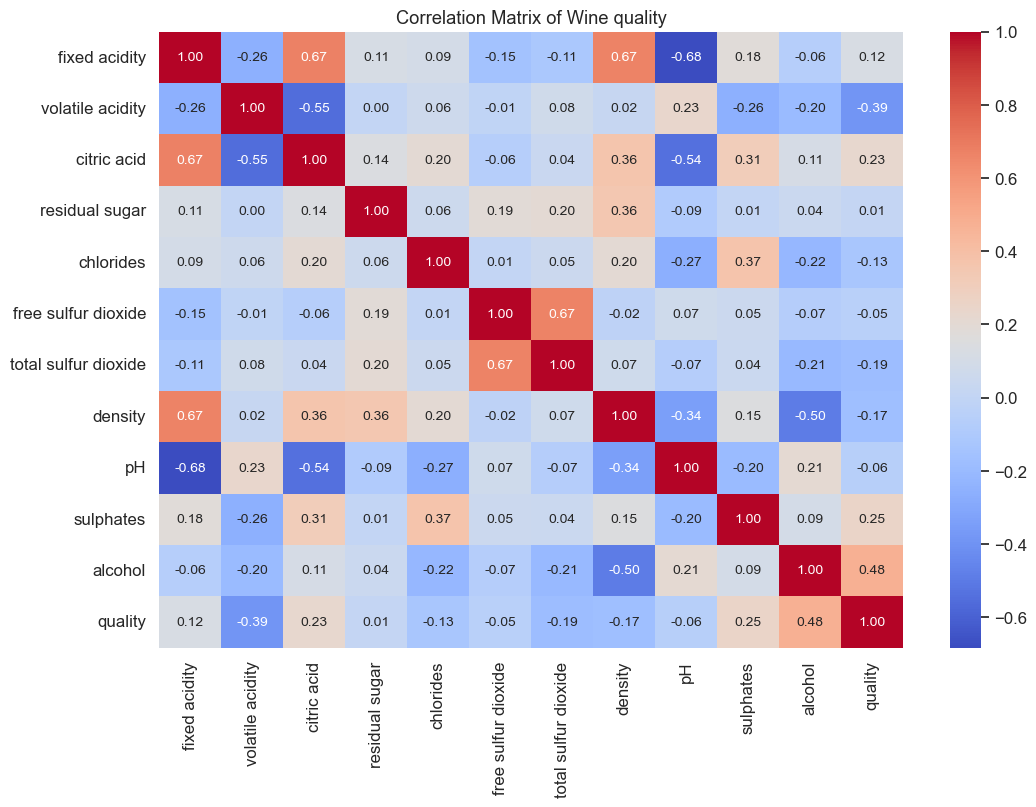

In [3]:

def correlation(x, y):
    x_mean = x.mean()
    y_mean = y.mean()

    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))

    return numerator / denominator

# Calculate the correlation matrix using the pearson_correlation function
correlation_matrix = df.apply(lambda x:
df.apply(lambda y: correlation(x, y)))
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Wine quality')
plt.show()

## Covariance Matrix of Wine Quality Using Heatmap

The below table shows the covariance between different attributes of wine quality using the covariance function and visualizes the covariance matrix as a heatmap . The heatmap provides a color-coded representation of the strength and direction of the covariance between each pair of attributes. The covariance matrix helps in understanding the linear relationship between different attributes of wine quality.

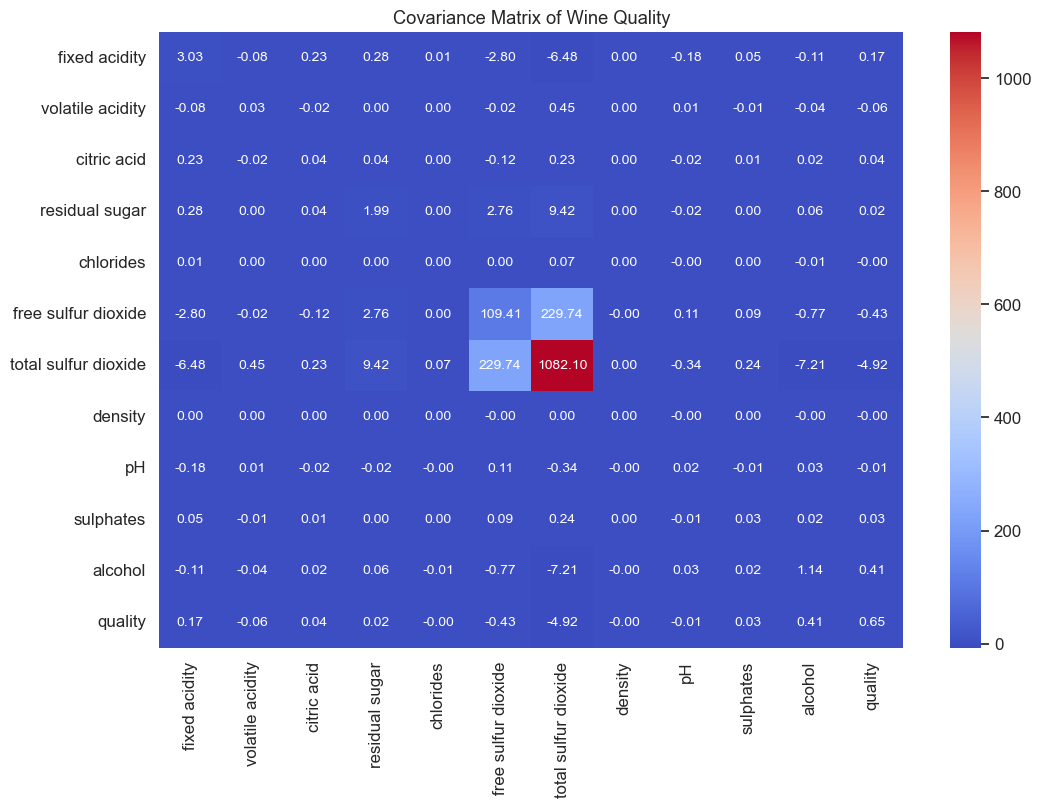

In [4]:
def covariance(x, y):
    x_mean = x.mean()
    y_mean = y.mean()

    return np.sum((x - x_mean) * (y - y_mean)) / (len(x) - 1)

# Calculate the covariance matrix using the covariance function
covariance_matrix = df.apply(lambda x: df.apply(lambda y: covariance(x, y)))

plt.figure(figsize=(12, 8))
sns.set(font_scale=1.1)
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f',
annot_kws={"size": 10})
plt.title('Covariance Matrix of Wine Quality')
plt.show()

# Distribution of Alcohol in Wine Quality  

Using two different histogram plots, this graph illustrates the distribution of the "alcohol" attribute in the wine quality . The 'histplot' function from the Seaborn library is used to create the first histogram plot, and the 'hist' function from the Matplotlib library is used to create the second histogram plot. The histogram plots reveal the frequency distribution of the dataset's "alcohol" values and shed light on its central tendency and distribution.

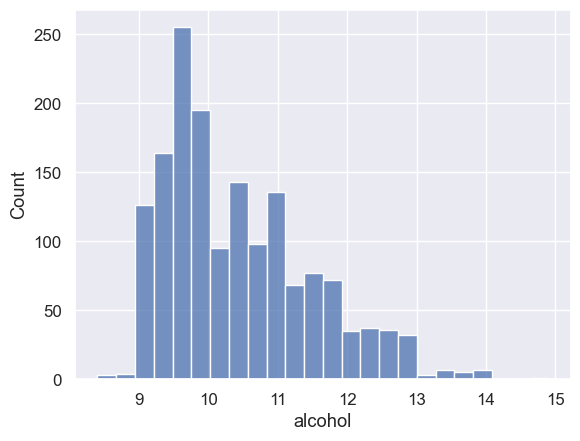

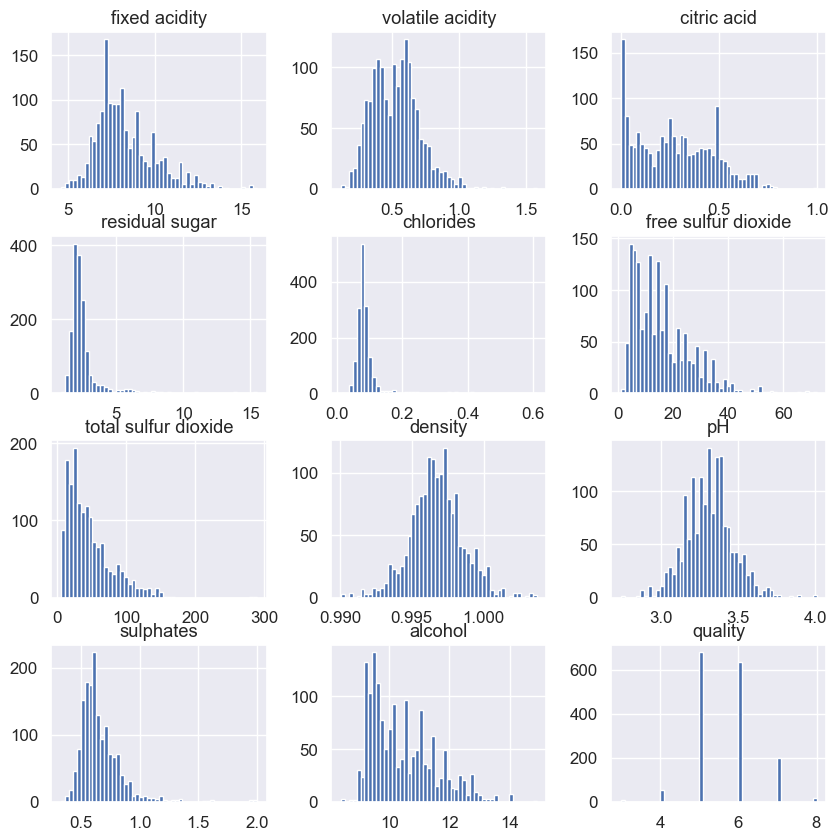

In [5]:
sns.histplot(df['alcohol'])
df.hist(figsize=(10,10),bins=50)
plt.show()

## Visualizing the effect of SMOTE oversampling on wine quality classification.

This below graph performs oversampling on the wine quality using Synthetic Minority Over-sampling Technique (SMOTE). It  visualizes the effect of oversampling on the distribution of wine quality classes using seaborn countplots. The left subplot shows the distribution of wine quality before oversampling, and the right subplot shows the distribution after oversampling. 

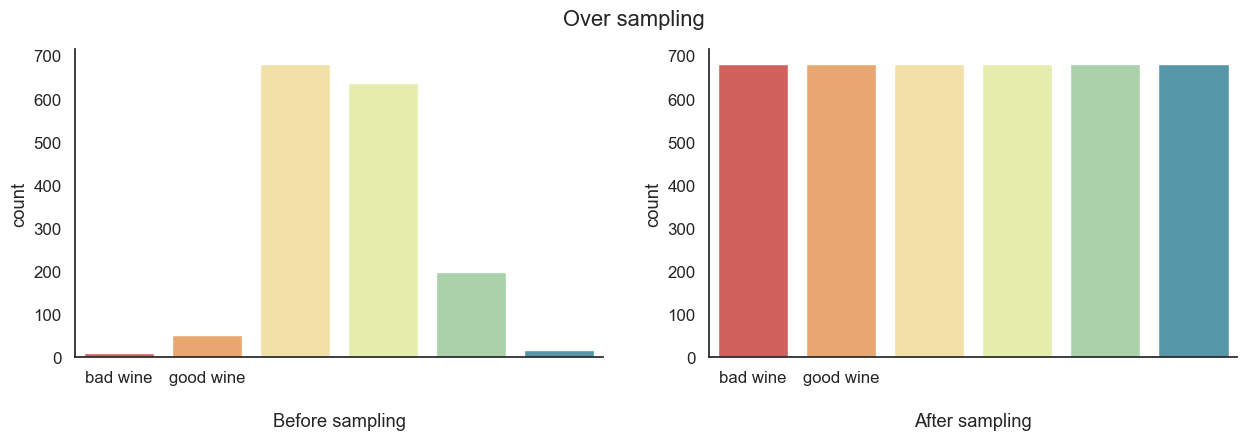

In [6]:
from imblearn.over_sampling import SMOTE

X = df.drop(['quality'], axis=1)
y = df.quality

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
sns.set_style("white")
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='quality', palette=palette)
plt.xticks([0,1], ['bad wine', 'good wine'])
plt.xlabel("\nBefore sampling")

plt.subplot(1, 2, 2)
sns.countplot(x=y_smote, palette=palette)
plt.xticks([0,1], ['bad wine', 'good wine'])
plt.xlabel("\nAfter sampling")

plt.suptitle('Over sampling \n\n\n')

sns.despine()

##  Visualizing the Relationship between Quality and Volatile Acidity in Wine

This below graph shows a barplot using the Seaborn library to show how the quality of wine and its volatile acidity relate to one another. Wine quality is displayed on the x-axis, which is a categorical variable, and volatile acidity is displayed on the y-axis, which is a continuous variable.


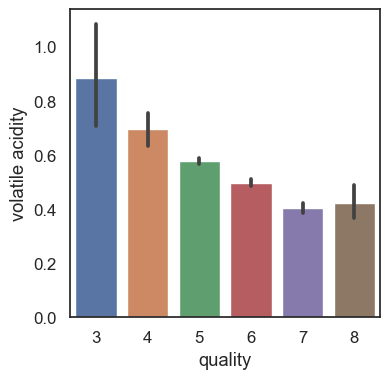

In [7]:
plt.figure(figsize=(4,4))
sns.barplot(x="quality",y="volatile acidity",data=df)
plt.show()

##  Plotting DataFrame

<Axes: >

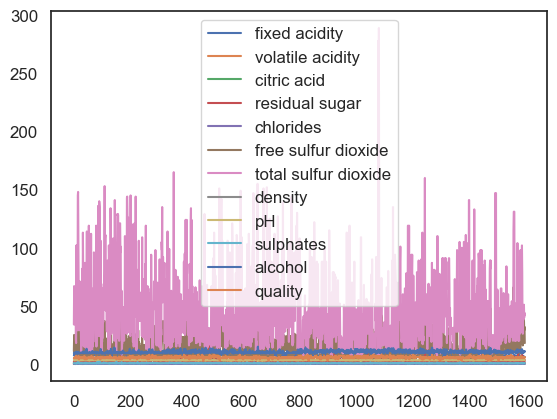

In [8]:
df.plot()

## Visualizing Wine Quality Counts

The below graph shows the count of each unique quality. The x-axis of the plot shows the unique quality ratings, and the y-axis shows the count of each rating. 

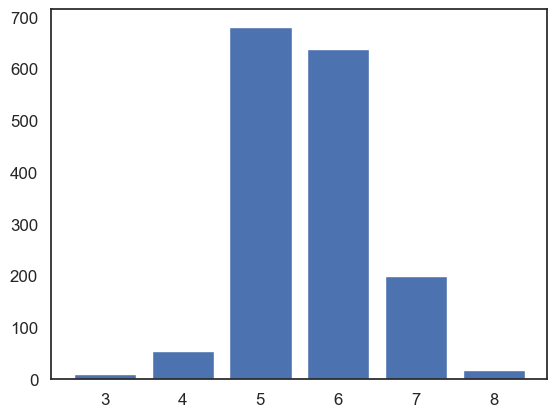

In [9]:
quality_counts = df['quality'].value_counts()
plt.bar(quality_counts.index, quality_counts.values)
plt.show()

## Relationship between Wine Quality and Its Features

The below set of plots provides a visual representation of the relationship between each feature and the target variable.

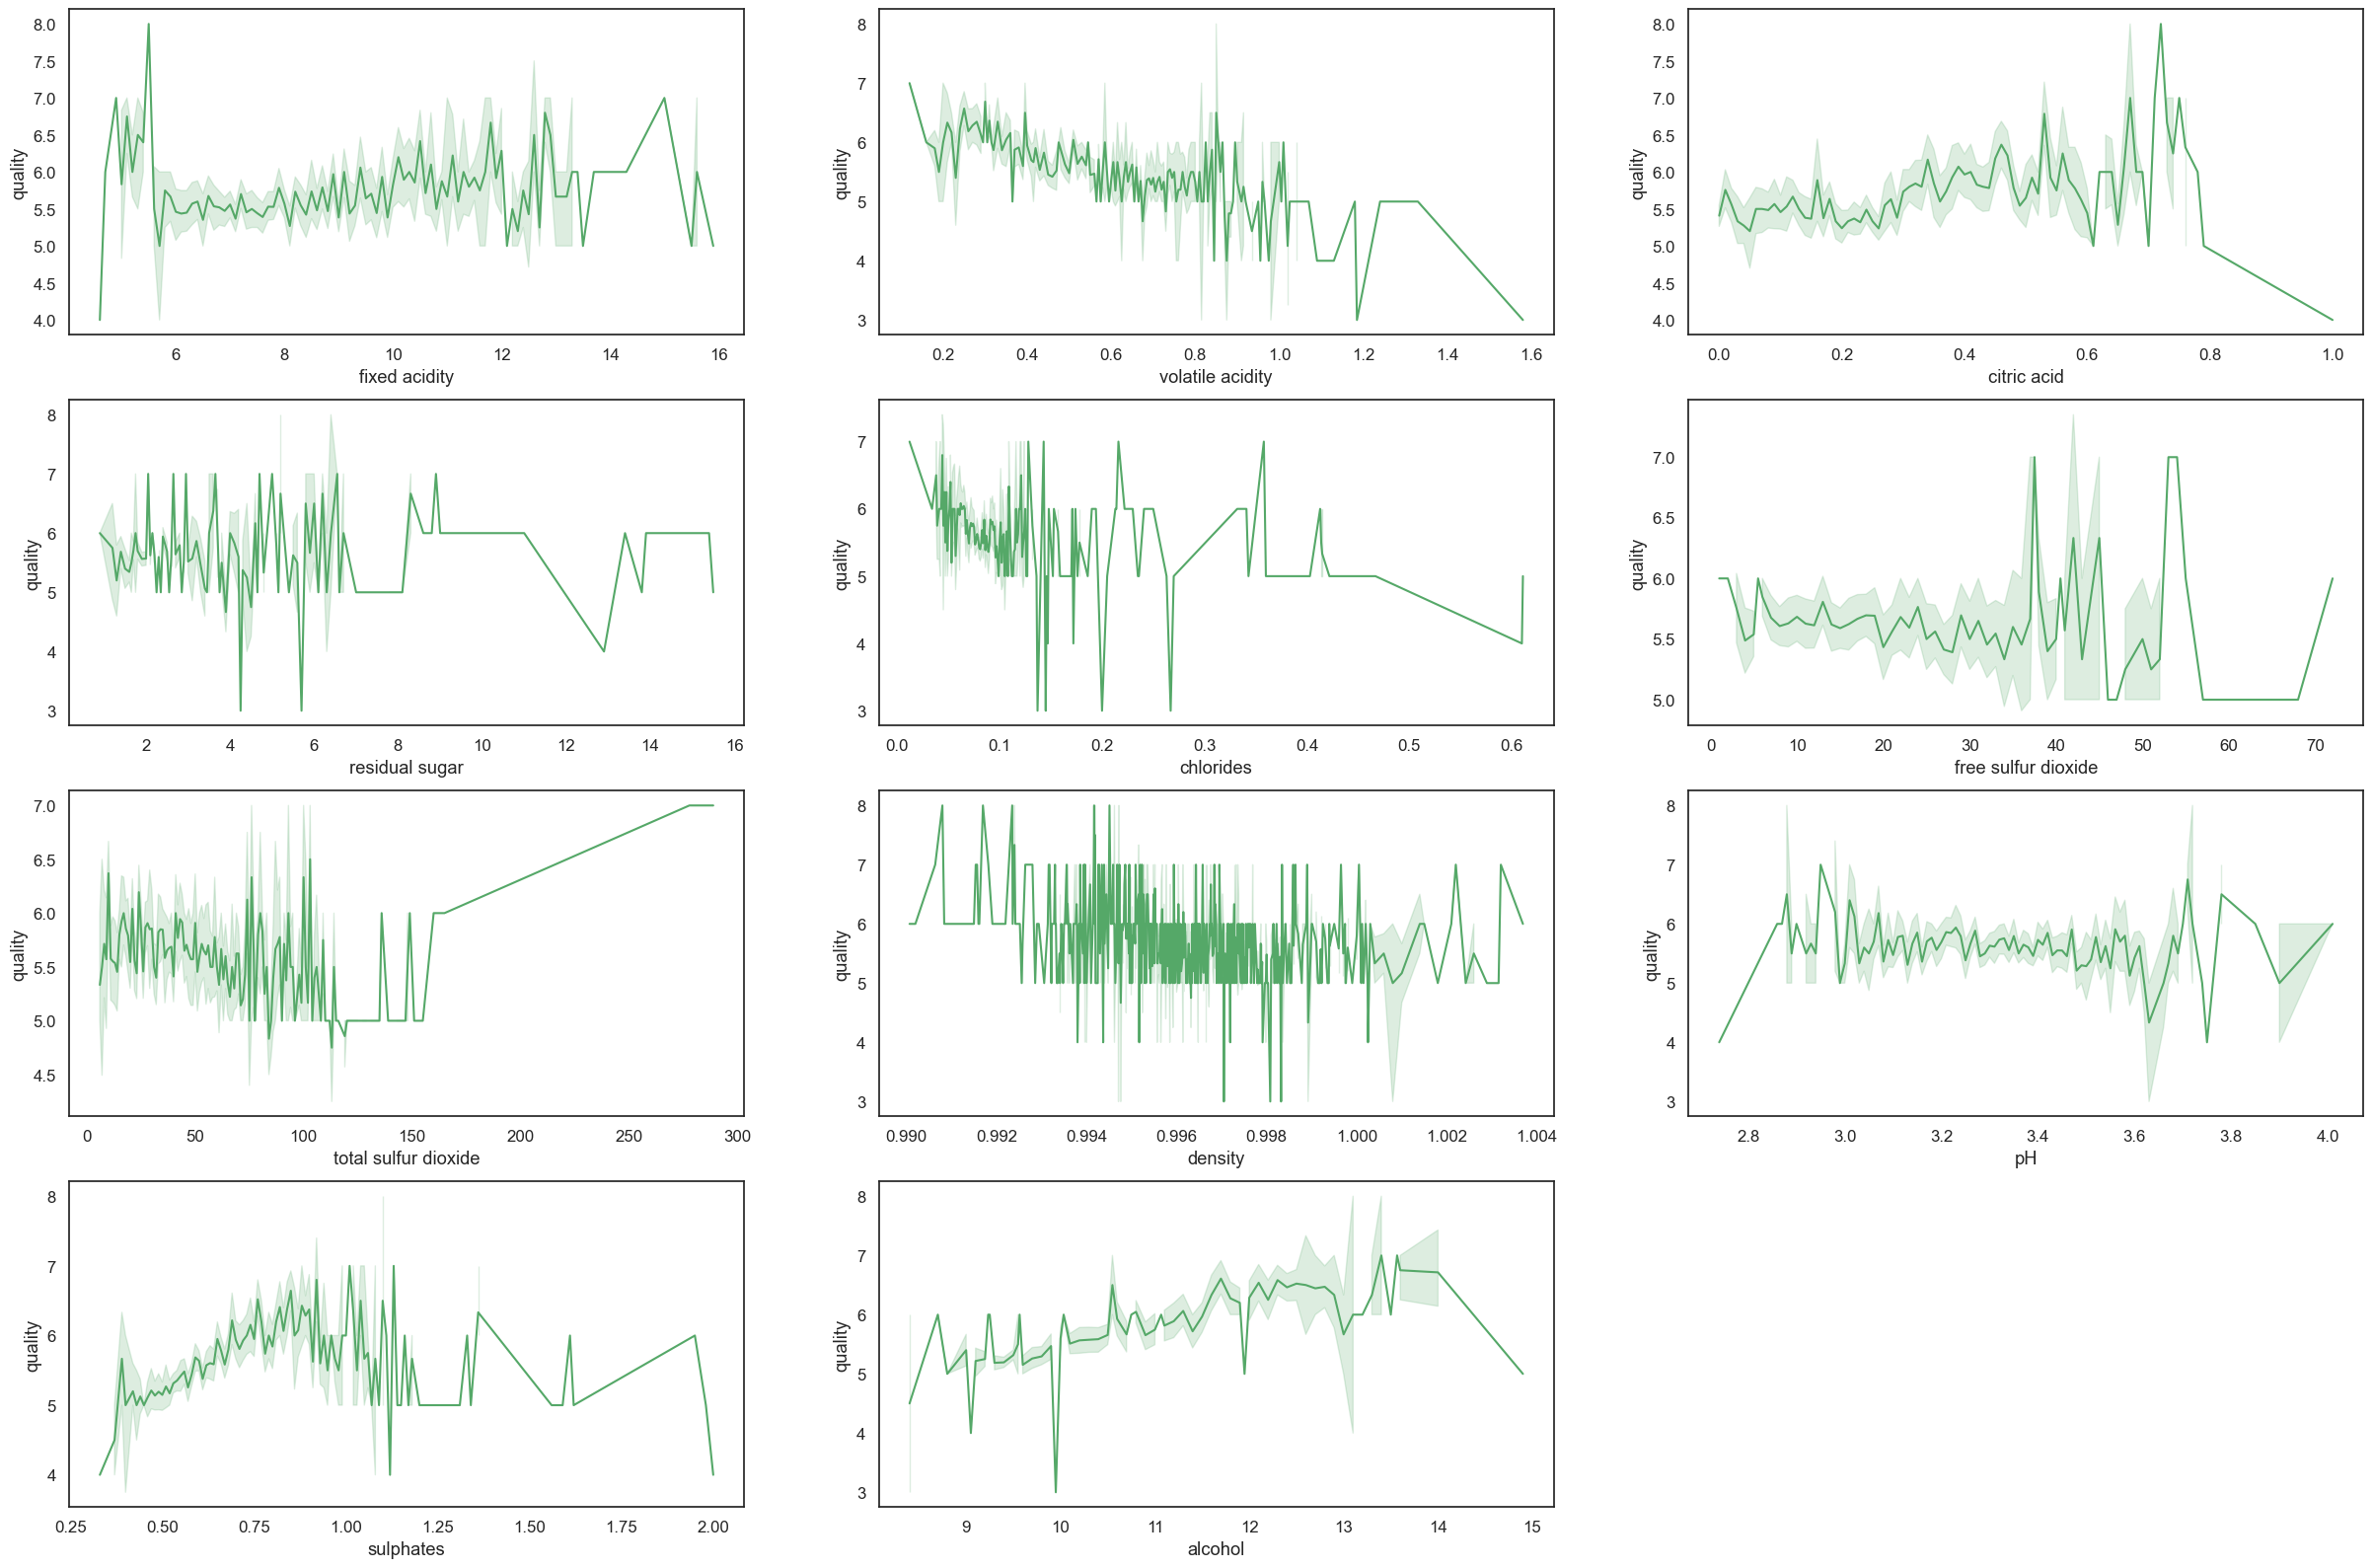

In [10]:
# relation between each feature and output
data_feature = df.columns[:-1]
plt.figure(figsize=(30,30))
for i in range(len(data_feature)):
  plt.subplot(6,3,i+1)
  sns.lineplot(x=df[str(data_feature[i])],y=df['quality'],c='g')

## Relationship between Wine Quality and Alcohol Content

The below scatterplot shows the distribution of wine quality ratings based on the alcohol content. 

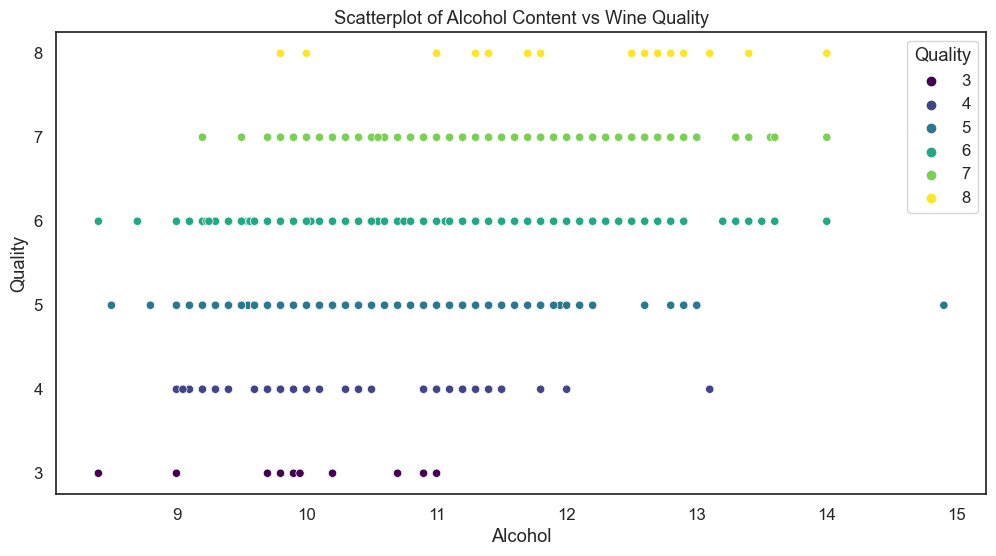

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='alcohol', y='quality', data=df, hue='quality',
palette='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Scatterplot of Alcohol Content vs Wine Quality')
plt.legend(title='Quality')
plt.show()

## Distribution of pH Values by Wine Quality

The below plot shows the distribution of pH values for each wine quality level in the form of a violin shape

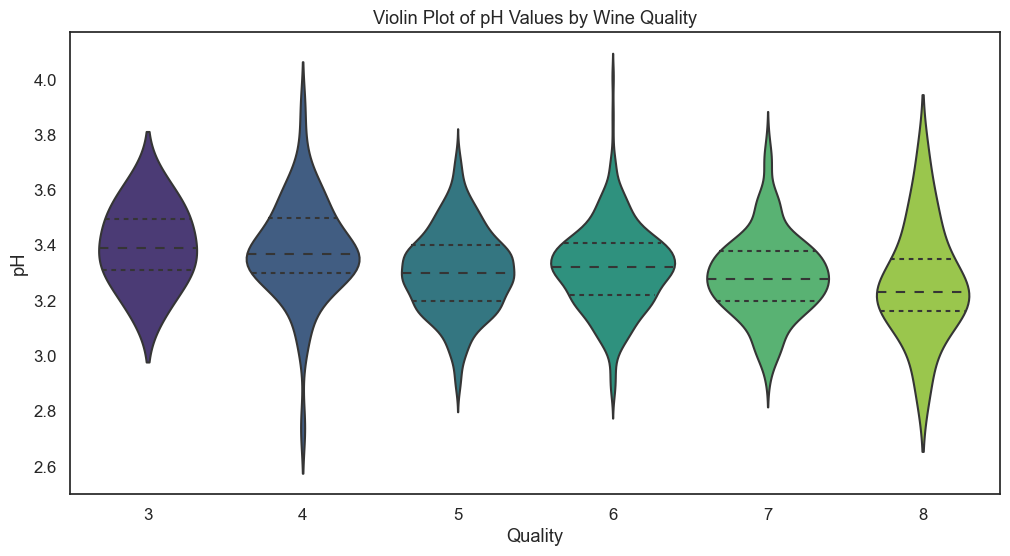

In [12]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='quality', y='pH', data=df, palette='viridis',
inner='quartile')
plt.xlabel('Quality')
plt.ylabel('pH')
plt.title('Violin Plot of pH Values by Wine Quality')
plt.show()

## Visualizing Relationships between Wine Quality and Selected Features

The below plot visualizes the relationships between wine quality and four selected features: total sulfur dioxide, density, pH, and quality.

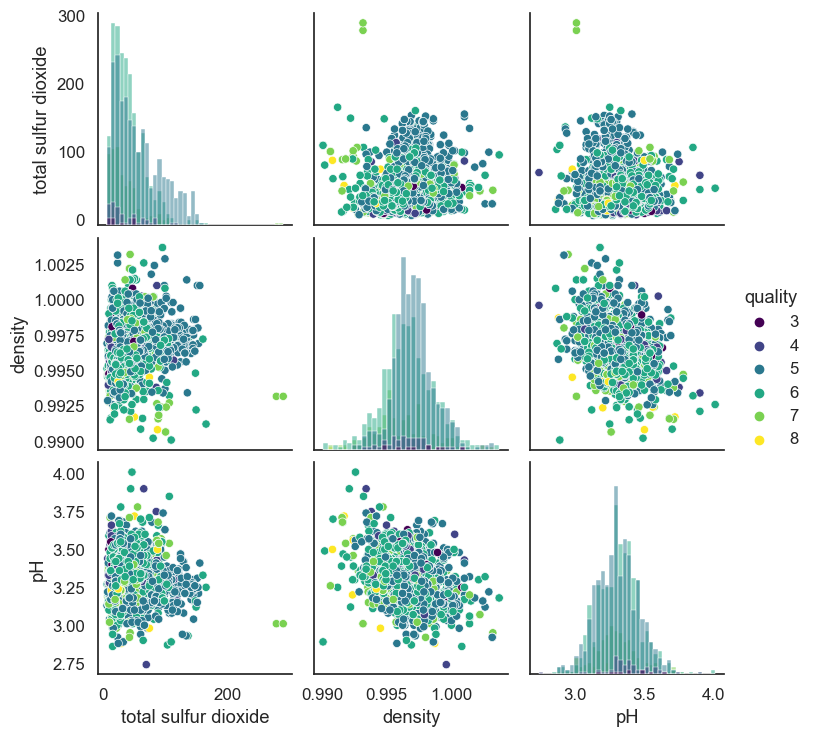

In [13]:
sns.pairplot(df[['total sulfur dioxide', 'density', 'pH', 'quality']],
hue='quality', palette='viridis', diag_kind='hist')
plt.show()

## Scatter Plot with Regression Line for Density and Residual Sugar

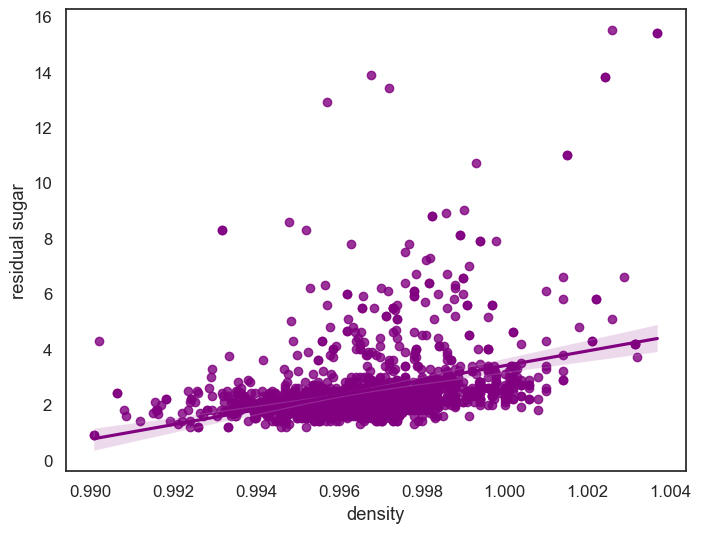

In [14]:
plt.figure(figsize=(8, 6))
sns.regplot(x='density', y='residual sugar', data=df, color='purple')
plt.show()

## Visualization of pH vs Quality using a Stripplot

The below stripplot visualizes the relationship between the quality and pH of wine

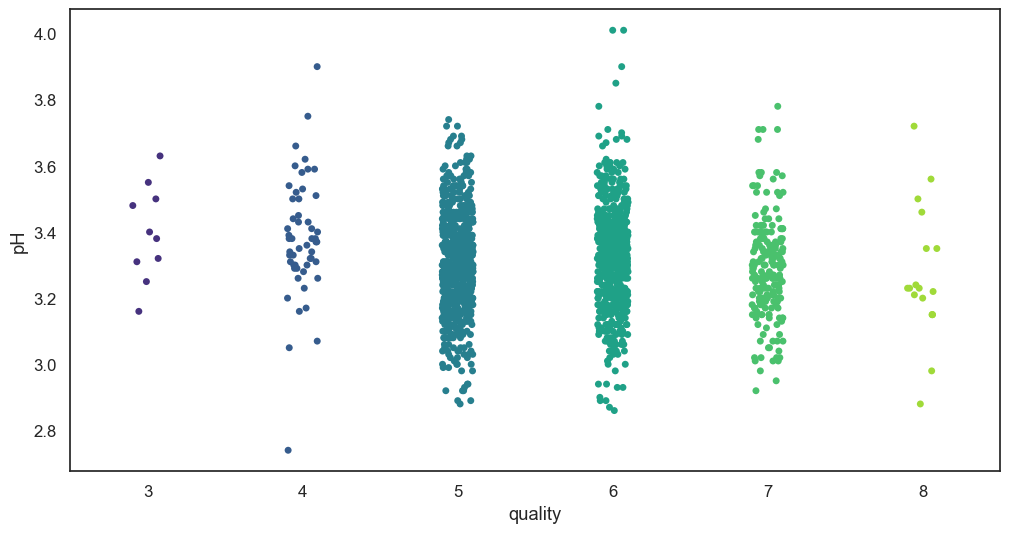

In [15]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='quality', y='pH', data=df, palette='viridis', jitter=True)
plt.show()

## Proportions of Fixed Acidity Categories by Wine Quality

The below plot helps visually identifies any patterns or relationships between wine quality and the proportion of fixed acidity categories.

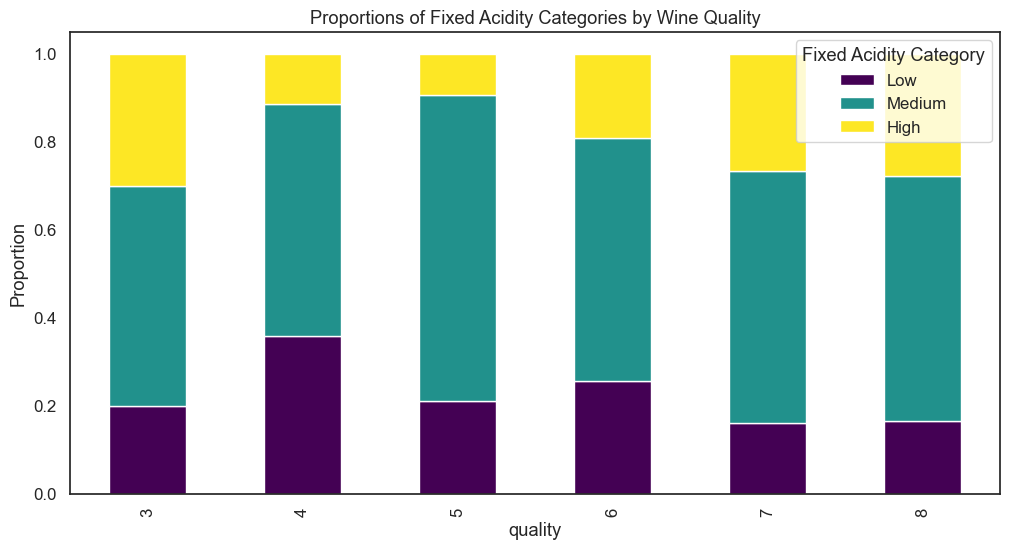

In [16]:
# Create a new categorical variable for fixed acidity
df['fixed_acidity_category'] = pd.cut(df['fixed acidity'], bins=[0, 7,
10, np.inf], labels=['Low', 'Medium', 'High'])

# Calculate proportions
grouped = df.groupby(['quality',
'fixed_acidity_category']).size().unstack().fillna(0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Plot the stacked barplot
proportions.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.ylabel('Proportion')
plt.title('Proportions of Fixed Acidity Categories by Wine Quality')
plt.legend(title='Fixed Acidity Category')
plt.show()

#  Violin plot of residual sugar vs wine quality

This violin plot shows the distribution of residual sugar values for different quality ratings of wines. The x-axis represents the quality ratings, while the y-axis represents the residual sugar content. The quartile lines inside the violins indicate the median, 25th and 75th percentiles of the data distribution. The plot uses a color palette called 'viridis' to represent the data points

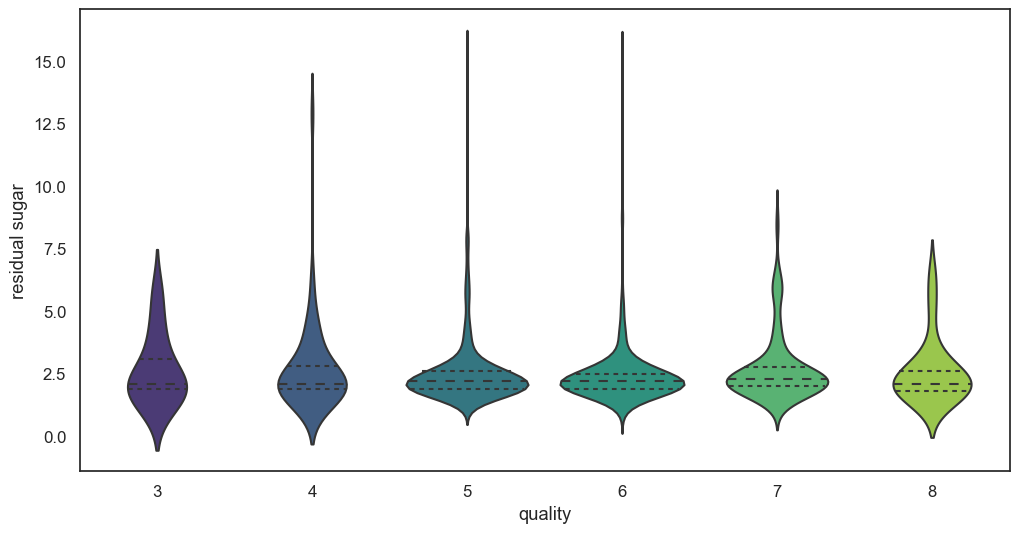

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='quality', y='residual sugar', data=df,
palette='viridis', inner='quartile')
plt.show()

## Reflections on learnings between using Excel and Python to apply Descriptive Statistics

 I chose a dataset from Kaggle for Assignment 1. I ran descriptive statistics against the dataset in Excel and came to some conclusions. To get a sense of how the data were distributed, I calculated metrics including mean, median, mode, variance, standard deviation, skewness, and kurtosis, among others. To see the data's distribution and spot outliers, I also made histograms and boxplots.



For assignment 2, I chose a different dataset from Kaggle and used Python and a Jupyter Notebook to apply descriptive statistics. For calculations, I used the pandas and numpy libraries, and I used matplotlib and seaborn to visualize the data. However, Python offered more flexibility in terms of data manipulation and analysis compared to Excel in the process. I was able to calculate more complex statistics with Python.


I discovered through these assignments that while both Excel and Python are useful tools for data analysis, they each have advantages and disadvantages. Excel is simple to use and has a graphical user interface, so even people without programming experience can use it. Excel has some limitations, though, and conducting complex analyses on sizable datasets can be time-consuming. Python, on the other hand, is more capable and adaptable, and it can effectively manage sizable datasets. Python, however, has a more difficult learning curve and calls for programming experience.

If I were to redo this assignment, I would pick a harder dataset that calls for more sophisticated analysis methods, like machine learning. To create more interactive and aesthetically pleasing visualizations, I would also investigate more sophisticated Python visualization libraries like Plotly and Bokeh.

My limited understanding of machine learning and deep learning is one of my programming knowledge's weaknesses. I have a fundamental understanding of these subjects, but I'd like to learn more about how to use these methods to solve actual problems. To better communicate data insights, I also want to develop my skills and data visualization abilities.

Overall, I now have a greater understanding of the value of descriptive statistics in data analysis, and these assignments have improved both my Excel and Python skills. I now recognize each tool's advantages and disadvantages and can choose the most appropriate tool for the task at hand.
